In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("./movies.csv")
data = data.dropna()

In [3]:
#Let's see if there is any missing data
for col in data.columns:
    nulls_average = np.mean(data[col].isnull())
    print('{}  -  {:.2f}%'.format(col, nulls_average * 100))

name  -  0.00%
rating  -  0.00%
genre  -  0.00%
year  -  0.00%
released  -  0.00%
score  -  0.00%
votes  -  0.00%
director  -  0.00%
writer  -  0.00%
star  -  0.00%
country  -  0.00%
budget  -  0.00%
gross  -  0.00%
company  -  0.00%
runtime  -  0.00%


In [4]:
data.dtypes 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
data["budget"] = data["budget"].astype("int64")
data["gross"] = data["gross"].astype("int64") 

In [6]:
#Extract only the year of release using the release date 
# Define a regular expression to extract four digits after the comma
pattern = r'(?:, )?(\d{4})'

# Use str.extract to extract the four digits
data['year'] = data['released'].str.extract(pattern, expand = False)
data['year'] = pd.to_numeric(data['year'], errors='coerce').fillna(0).astype(int)
data["year"] = data["year"].astype("int64")

In [7]:
data.sort_values(by = ["gross"], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [8]:
#Find any duplicates 
np.mean(data.duplicated())

0.0

In [15]:
#Standardize company names
company_names = data["company"].sort_values().drop_duplicates()
from itertools import combinations
from fuzzywuzzy import fuzz

In [16]:
# Function to calculate similarity score
def calculate_similarity(pair):
    return fuzz.token_set_ratio(pair[0], pair[1])

In [19]:
# Generate all possible combinations of company names
combinations_list = list(combinations(company_names, 2))

In [20]:
similarity_scores = [(pair[0], pair[1], calculate_similarity(pair)) for pair in combinations_list]

In [26]:
scores = pd.DataFrame(similarity_scores, columns=['company1', 'company2', 'score'])

In [40]:
filtered_score = scores[scores['score'] >= 100]

In [41]:
dictionary_changes = dict(zip(filtered_score['company1'], filtered_score['company2']))
#We eliminate some incorrect pairs.
dictionary_changes

{'AVCO Embassy Pictures': 'Embassy Pictures',
 'Alliance': 'Aurora Alliance Films',
 'Alliance Films': 'Aurora Alliance Films',
 'American Playhouse': 'American Playhouse Theatrical Films',
 'Astral Bellevue Pathé': 'Pathé',
 'Atlas Productions': 'Cloud Atlas Productions',
 'Aurora': 'Aurora Alliance Films',
 'Bachelor Party Productions': 'Party Productions',
 'British Broadcasting Corporation (BBC)': 'British Broadcasting Corporation (BBC) Television',
 'CBS Films': 'CBS Theatrical Films',
 'Canal+': 'Canal+ España',
 'Cannon Films': 'Cannon Films Inc.',
 'Cannon Group': 'The Cannon Group',
 'Carthago Films S.a.r.l.': 'L.A. Films',
 'Channel Films': 'Channel Four Films',
 'Cinema City Films': 'City Films',
 'Cineplex Odeon Films': 'Odeon Films',
 'Circle Films': 'Gold Circle Films',
 'City Films': 'Open City Films',
 'Columbia Pictures': 'Columbia Pictures Industries',
 'Constantin Film': 'Constantin Film International',
 'Constellation': 'Constellation Entertainment',
 'DENTSU Music 

Text(0, 0.5, 'Gross (Dollars $)')

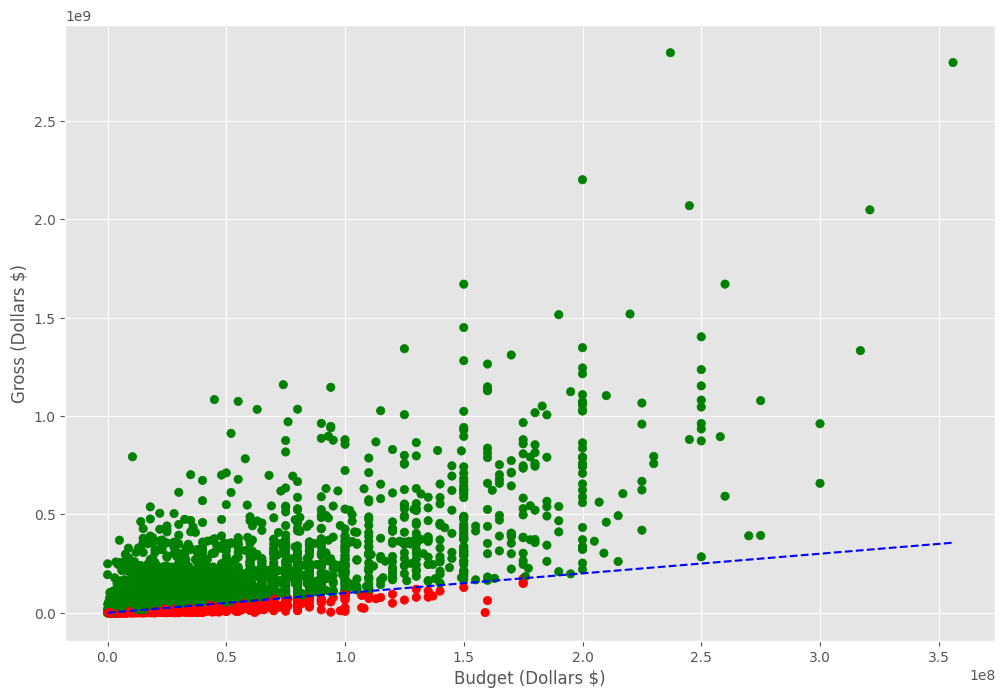

In [44]:
#To look for correlation in variables we will use a scatter plot. (budget vs gross, as they are numeric values is better to use a scatter plot)
x_values = data["budget"]
y_values = data["gross"]
plt.scatter(x_values, y_values, color=['red' if y < x else 'green' for x, y in zip(x_values, y_values)])
plt.plot([min(x_values), max(x_values)], [min(x_values), max(x_values)], linestyle='--', color='blue', label='y = x')
plt.xlabel("Budget (Dollars $)")
plt.ylabel("Gross (Dollars $)")
#All below the line generated less than the budget invested. 

Text(0, 0.5, 'Gross (Dollars $)')

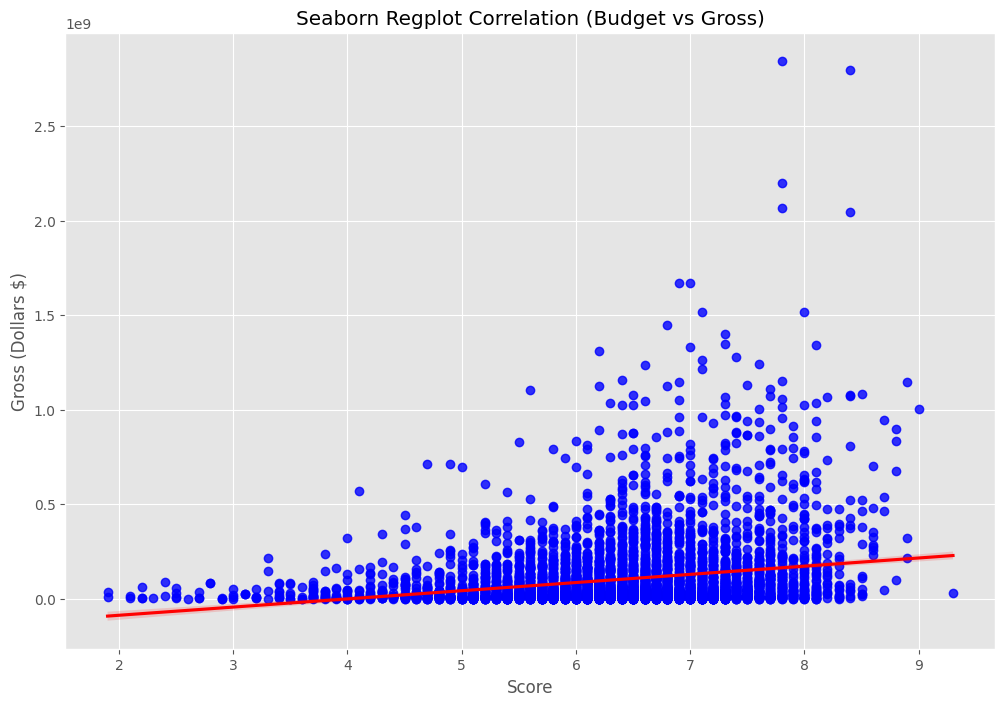

In [59]:
import seaborn as sns
x_values = data["score"]
y_values = data["gross"]

sns.regplot(x = x_values, y = y_values, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


plt.title('Seaborn Regplot Correlation (Score vs Gross)')
plt.xlabel('Score')
plt.ylabel('Gross (Dollars $)')



In [52]:
# Calculate the correlation coefficient using numpy
correlation_matrix = np.corrcoef(x_values, y_values)

# Extract the correlation coefficient from the matrix
correlation_coefficient = correlation_matrix[0, 1]
correlation_coefficient

0.7402465439219634

In [56]:
#Correlation with all numeric values.
data.corr(method = "pearson", numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


Text(120.72222222222221, 0.5, 'Movie Variables')

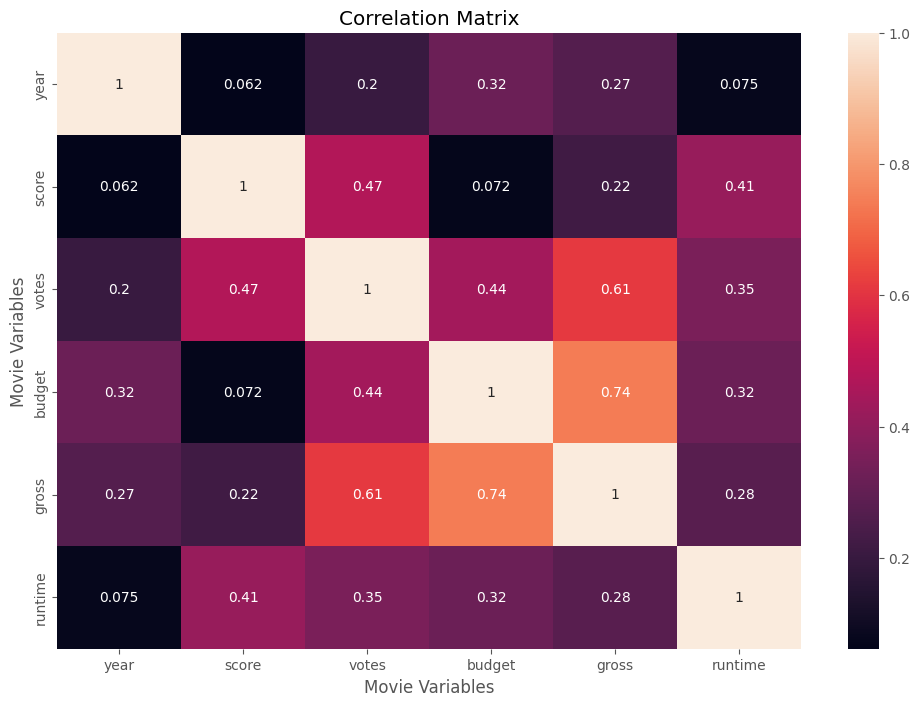

In [61]:
#How to see it with a heatmap.
corr_matrix = data.corr(method = "pearson", numeric_only = True)
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Variables")
plt.ylabel("Movie Variables")

In [71]:
#Create a numeric representation for every column so we can obtain the correlation. 
data_numerized = data

for column in data_numerized.columns:
    if(data_numerized[column].dtype == "category" or data_numerized[column].dtype == "object"):
        data_numerized[column] = data_numerized[column].astype("category")
        data_numerized[column] = data_numerized[column].cat.codes
data_numerized.dtypes


name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget        int64
gross         int64
company       int16
runtime     float64
dtype: object

Text(120.72222222222221, 0.5, 'Movie Variables')

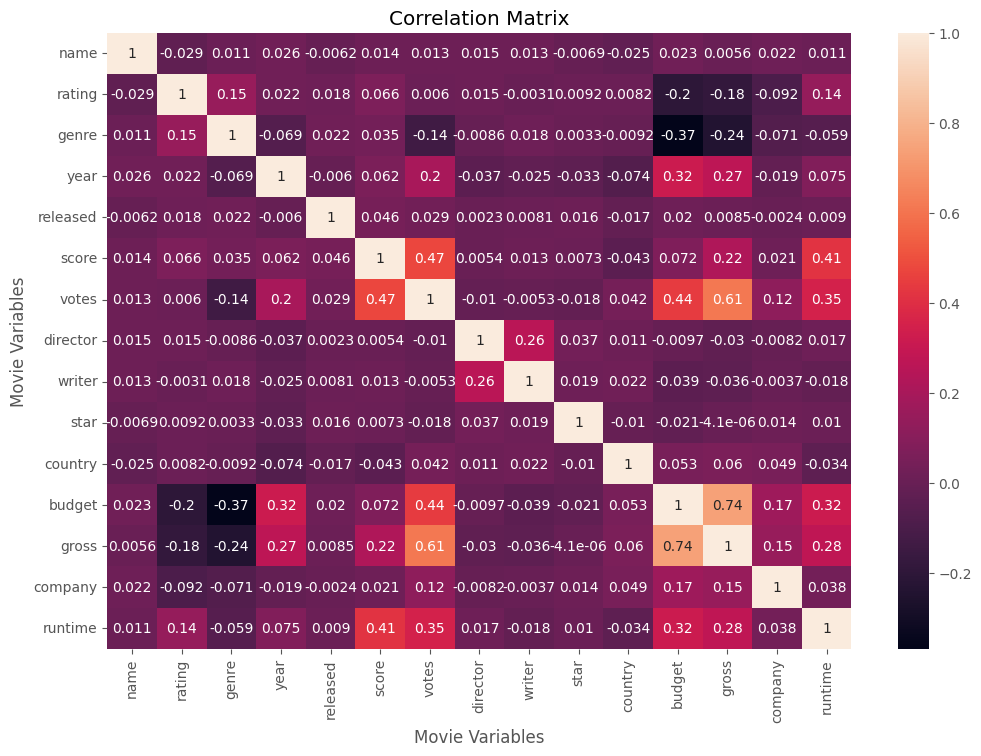

In [72]:
corr_matrix = data_numerized.corr(method = "pearson", numeric_only = True)
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Variables")
plt.ylabel("Movie Variables")

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [83]:
#Another way of visualize it.
correlation_matrix = data_numerized.corr()
sorted_correlation = correlation_matrix.unstack().sort_values()
sorted_correlation

budget   genre     -0.368523
genre    budget    -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [105]:
high_corr = sorted_correlation[(sorted_correlation) >= 0.5]
low_corr = sorted_correlation[(sorted_correlation) <= -0.2]

In [106]:
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [107]:
low_corr

budget  genre    -0.368523
genre   budget   -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
budget  rating   -0.203946
rating  budget   -0.203946
dtype: float64

In [ ]:
data.to_excel("finalMovies.xlsx", index = False)